<h2 align='center'>Analysis of Olympic Athletes
</h2>

This project is based on content covering geospatial and time series data. We will perform some basic data cleaning and exploration techniques on a prescribed dataset. The aim is to explore it and make
observations

# **Mount drive**

In [27]:
from google.colab import drive

In [28]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imports**

In [29]:
!pip install pycountry

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pycountry as pyc
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from shapely.geometry import Point

# **Read in dataset**

In [31]:
df_main = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Assignment 2/athlete_events.csv", low_memory=False)

In [32]:
df_main.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# **Removing Outliers and bad data**

In [33]:
df_main.shape

(271116, 15)

Analytical summary

In [34]:
df_main.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [35]:
#df_main.hist(figsize=(10, 10))

In [36]:
# # Pairplot (for exploring multiple variables)

 **Removing bad data**

First thing we wanted to get rid of here are the non values in **Age**, **Weight**, **Height**, hyphens from the team column, numbers from country names as that can be bad data in our analysis.

In [37]:
#We were Removing Bad Data

# Specify the columns you want to check for NA values.
columns_to_check = ["Age", "Weight", "Height"]

# Remove rows with NA values in the specified columns.
df_cleaned = df_main.dropna(subset=columns_to_check)

# Remove numbers after the country names
df_cleaned['Team'] = df_cleaned['Team'].str.replace(r'\d+', '')

# Optionally, you can reset the index if you want to maintain a continuous index.
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.to_csv('output_file.csv', index=False)

########################################
clean=pd.read_csv('output_file.csv')

# Remove hyphens and numbers from the 'team' column
df_cleaned['Team'] = clean['Team'].str.replace(r'[-\d]', '')

# Print the DataFrame with cleaned team names
print(clean)

# Save the cleaned data to a new CSV file
clean.to_csv('cleaned_output_file.csv', index=False)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
3            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
4            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
206160  135569                Andrzej ya   M  29.0   179.0    89.0   
206161  135570                  Piotr ya   M  27.0   176.0    59.0   
206162  135570                  Piotr ya   M  27.0   176.0    59.0   
206163  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
206164  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

               Team  NOC        Games  Year  Season            City  \
0             China  CHN  1992 Summer  1992  Summer       Barcelona   
1             Chi

After cleaning the data in our initial step, we can see thatthe number of columns have reduced from 271116 rows to 206165 rows i.e., they reduced by 23.95%

**Removing outliers**

In [38]:
df = pd.read_csv('cleaned_output_file.csv', sep=',')
# print(df.columns)


In [39]:
# Specify the columns you want to check for outliers.
columns_to_check = ["Weight", "Height"]

# Define a function to identify outliers using the Z-score method and remove them.
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    data_no_outliers = data[z_scores <= threshold]
    return outliers, data_no_outliers

# Check for and remove outliers in each specified column.
for column in columns_to_check:
    outliers, df = remove_outliers_zscore(df, column)

    print(f"Outliers in {column} column:")
    print(outliers)

# Remaining data without outliers
print("Data without outliers:")
print(df)


Outliers in Weight column:
            ID                      Name Sex   Age  Height  Weight  \
47          18      Timo Antero Aaltonen   M  31.0   189.0   130.0   
68          22             Andreea Aanei   F  22.0   170.0   125.0   
269        212  Yasser Abdel Rahman Sakr   M  30.0   180.0   120.0   
351        282         Hadi Abdul Jabbar   M  30.0   180.0   117.5   
352        282         Hadi Abdul Jabbar   M  34.0   180.0   117.5   
...        ...                       ...  ..   ...     ...     ...   
205788  135357                Ji Zubrick   M  28.0   188.0   161.0   
205865  135401        Eurelijus ukauskas   M  22.0   218.0   115.0   
205866  135401        Eurelijus ukauskas   M  27.0   218.0   115.0   
205867  135401        Eurelijus ukauskas   M  30.0   218.0   115.0   
205910  135431                 Stipe uni   M  25.0   193.0   134.0   

                  Team  NOC        Games  Year  Season            City  \
47             Finland  FIN  2000 Summer  2000  Summer    

**Checking and removing Duplicates**



*   Since on the data set the ID is unique for each participant, in order to check for duplicates we only need to check the repeating in the ID, year and season. This is because a person can participate in the Olypmics more that once(we might have cases where we have one ID repeating in different year, which does not mean that the data has been duplicated), same applies to season in which the Olympics occured.
*   After identifying these duplicates we will have to remove them from the athlete_events dataset until we have none duplicate values.



In [40]:
df = pd.read_csv('cleaned_output_file.csv', sep=',')

Duplicate_rows = df[df.duplicated(subset=['ID', 'Year', 'Season'],keep=False)].sort_values(by=['ID', 'Year', 'Season'])
df = Duplicate_rows.drop_duplicates(subset=['ID', 'Year'], keep='first').reset_index(drop=True)

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
2,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
3,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
4,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN
35479,135559,Pawe Jan Zygmunt,M,21.0,182.0,79.0,Poland,POL,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
35480,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
35481,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN


**Events that never occured**

In [41]:
# And the lists you provided are named winter_olympics and summer_olympics

winter_olympics = {
   1924: "Chamonix, France",
    1928: "St. Moritz, Switzerland",
    1932: "Lake Placid, United States",
    1936: "Garmisch-Partenkirchen, Germany",
    1948: "St. Moritz, Switzerland",
    1952: "Oslo, Norway",
    1956: "Cortina d'Ampezzo, Italy",
    1960: "Squaw Valley, United States",
    1964: "Innsbruck, Austria",
    1968: "Grenoble, France",
    1972: "Sapporo, Japan",
    1976: "Innsbruck, Austria",
    1980: "Lake Placid, United States",
    1984: "Sarajevo, Yugoslavia",
    1988: "Calgary, Canada",
    1992: "Albertville, France",
    1994: "Lillehammer, Norway",
    1998: "Nagano, Japan",
    2002: "Salt Lake City, United States",
    2006: "Turin, Italy",
    2010: "Vancouver, Canada",
    2014: "Sochi, Russia"
}

summer_olympics = {
    1896: "Athens, Greece",
    1900: "Paris, France",
    1904: "St. Louis, United States",
    1908: "London, United Kingdom",
    1912: "Stockholm, Sweden",
    1920: "Antwerp, Belgium",
    1924: "Paris, France",
    1928: "Amsterdam, Netherlands",
    1932: "Los Angeles, United States",
    1936: "Berlin, Germany",
    1948: "London, United Kingdom",
    1952: "Helsinki, Finland",
    1956: "Melbourne, Australia",
    1960: "Rome, Italy",
    1964: "Tokyo, Japan",
    1968: "Mexico City, Mexico",
    1972: "Munich, West Germany",
    1976: "Montreal, Canada",
    1980: "Moscow, Soviet Union",
    1984: "Los Angeles, United States",
    1988: "Seoul, South Korea",
    1992: "Barcelona, Spain",
    1996: "Atlanta, United States",
    2000: "Sydney, Australia",
    2004: "Athens, Greece",
    2008: "Beijing, China",
    2012: "London, United Kingdom",
    2016: "Rio de Janeiro, Brazil"
}

def check_event(row):
    year = row['Year']
    city = row['City']
    event = row['Event']

    if 'Winter' in event:
        if winter_olympics.get(year) != city:
            return False
    elif 'Summer' in event:
        if summer_olympics.get(year) != city:
            return False
    return True

df['is_correct'] = df.apply(check_event, axis=1)


In [42]:
# This will print all rows where 'is_correct' is False
incorrect_rows = df[df['is_correct'] == False]
print(incorrect_rows[['Event', 'is_correct']])


Empty DataFrame
Columns: [Event, is_correct]
Index: []


For the events that never occured, we gathered a list of years, city and country from the internet and then we checked in the events, year and city column in our dataset for both summer and winter season, where there are events that do not correspond with the year and city we provided in the list, we mark it as false in the new column ***is_correct*** we just created, else otherwise we mark it true meaning the even did happen.

From the results above we can see that we do not have none existant events in our dataset.

**Mislabeled countries**

In [43]:
df_cd = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Assignment 2/country_definitions.csv", low_memory=False)

In [44]:
df_cd

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


Here we create a list, `mislabeled`. It will contain all the rows in the dataset that we deem mislabeled after "filtering" them.



In [45]:
 # Initialize the mislabeled list
mislabeled = []

# Iterate over the rows in the DataFrame
for index, row in df_cd.iterrows():
    # check if NOC matches first three characters of region
    if type(row["region"]) == float:
      mislabeled.append(row)
      continue
    if row['NOC'].lower() == row['region'][:3].lower():
      # print("{}, {}".format(row['NOC'].lower(), row['region'][:3].lower()))
      continue  # Skip this row, it's not mislabeled
    # Get the country object for the NOC
    country = pyc.countries.get(alpha_3=row['NOC'])
    # If the country object is not None
    if country is not None:
        # If the country's name is not the same as the region or notes
        if country.name != row['region'] and country.name != row['notes']:
            # Mark the row as mislabeled
            mislabeled.append(row)
    else:
        # If the country object is None, check if region is a string
        if isinstance(row['region'], str):
            # Get the country object for the region
            country = pyc.countries.get(name=row['region'])

        # If the country object is not None
        if country is not None:
            # If the country's alpha-3 code is not the same as the NOC
            if country.alpha_3 != row['NOC']:
                # Mark the row as mislabeled
                mislabeled.append(row)
        else:
            # If the country object is still None, check if notes is a string
            if isinstance(row['notes'], str):
                # Get the country object for the notes
                country = pyc.countries.get(name=row['notes'])

                # If the country object is not None and its alpha-3 code is not the same as the NOC
                if country is not None and country.alpha_3 != row['NOC']:
                    # Mark the row as mislabeled
                    mislabeled.append(row)
            else:
              #If all conditions are missed, check if NOC matches first three characters of region
              if row['NOC'].lower() == row['region'][:3].lower():
                print("{}, {}".format(row['NOC'].lower(), row['region'][:3].lower()))
                continue  # Skip this row, it's not mislabeled
              else:
                  # Mark the row as mislabeled
                mislabeled.append(row)

In [46]:
# Create a new DataFrame from the mislabeled list
df_mislabeled = pd.DataFrame(mislabeled)
df_mislabeled

,NOC,region,notes
7,ANZ,Australia,Australasia
11,ASA,American Samoa,NaN
24,BIZ,Belize,NaN
30,BRN,Bahrain,NaN
38,CGO,Republic of Congo,NaN
...,...,...,...
221,VIN,Saint Vincent,NaN
222,VNM,Vietnam,NaN
224,YAR,Yemen,North Yemen
226,YMD,Yemen,South Yemen


What we've done above is create some sort of a filter.

The first case checks if the value in `region` is a `float`, for which it was in some cases. This we considered as mislabeled, hecne we "mark" it, i.e append it to `mislabeled`.

The second case is the mpst basic filter. It chekcs if the first three characters in the `NOC` column match the first three characters in the `region` column.

For the remaining cases, we use the `pycountries` package. Given a `NOC` value, it can generate the name of the country, `region` in this case, and vice-versa. It uses the current values available on the internet. It takes the value in the `NOC` column and generatea a `pycountires` object from it, e.g:
```# Get the country object for Germany
country = pyc.countries.get(alpha_3="FRG")
```
where `alpha_3` is the three-letter abbreviation of that country, `NOC` in this case.

If the object is not `None`, then use its `.name` attribute to check if its the same as the value in the `regio`n column or the `note`s column. If that's true, then we leave the row unchanged, i.e its not mislabeled. Else, we "mark it", i.e append it to `mislabeled`.

If the object is `None`, then use the value in the `region` column instead to generate the country object. If it's not `None`, we proceed as the above.

If the object is still `None` then use the value in the `notes` column and proceed as above.

We suspect we may have some special cases that might miss all these conditions, for example: | NFL | Canada | Newfoundland |. In this case, just append them to `mislabeled` and we'll "eyeball" them later with some research on the internet.

As we can see from the results above that we managed to get 61 mislabeled countries from our dataframe, we also had cases where the countries like Serbia having the the `alpha_3` name from their old names pre world war 2 events e,g., Yugoslavia and using the `pycountry` tool we  did not manage to correct Serbia with its current `alpha_3` value, though some of the countries we managed to correct them.

Some special cases that we found include South Africa with current `alpha_3` values that do not match their first 3 letters of their names but using the `pycountry` to get the correct `alpha_3` value it always returns the current `NOC` value hence this means that we can not change RSA as the `alpha 3` value for South Africa.

# **By Country Analysis**

In [53]:
countries_df = df_main.groupby('NOC').agg({
    'Medal': [('Gold', lambda x: (x == 'Gold').sum()),
              ('Silver', lambda x: (x == 'Silver').sum()),
              ('Bronze', lambda x: (x == 'Bronze').sum())],
    'Name': 'count',
    'Weight': [('MeanWeight', 'mean'), ('MaxWeight', 'max'), ('MinWeight', 'min')],
    'Height': [('MeanHeight', 'mean'), ('MaxHeight', 'max'), ('MinHeight', 'min')],
    'Sex': [('FractionMale', lambda x: (x == 'M').mean())]
}).reset_index()

countries_df.columns = [col[0] if col[1] == '' else f'{col[1]}' for col in countries_df.columns]
countries_df.head()

,NOC,Gold,Silver,Bronze,count,MeanWeight,MaxWeight,MinWeight,MeanHeight,MaxHeight,MinHeight,FractionMale
0,AFG,0,0,2,126,65.901639,111.0,48.0,170.592593,186.0,156.0,0.960317
1,AHO,0,1,0,79,76.176471,120.0,52.0,177.294118,193.0,152.0,0.848101
2,ALB,0,0,0,70,71.491803,130.0,45.0,173.000000,195.0,159.0,0.614286
3,ALG,5,4,8,551,68.693252,125.0,45.0,174.702869,200.0,146.0,0.829401
4,AND,0,0,0,169,70.644444,90.0,49.0,173.703704,189.0,160.0,0.751479


from the above code we find The number of golds, silvers, bronzes each coutnry has won and the to- tal number of participations (counting athletes who’ve competed multiple times a corresponding number of times). We also look for mean, maximum and minimum weights and heights and fraction of athletes of each gender.


Below we engineer a column indicating number of sports each country has medaled and participated in.

In [54]:
countries_df['SportsParticipated'] = df_main.groupby('NOC')['Sport'].nunique().to_list()
countries_df['SportsMedaled'] = countries_df['Gold']	+ countries_df['Silver']	+ countries_df['Bronze']
countries_df.head()

,NOC,Gold,Silver,Bronze,count,MeanWeight,MaxWeight,MinWeight,MeanHeight,MaxHeight,MinHeight,FractionMale,SportsParticipated,SportsMedaled
0,AFG,0,0,2,126,65.901639,111.0,48.0,170.592593,186.0,156.0,0.960317,7,2
1,AHO,0,1,0,79,76.176471,120.0,52.0,177.294118,193.0,152.0,0.848101,13,1
2,ALB,0,0,0,70,71.491803,130.0,45.0,173.000000,195.0,159.0,0.614286,8,0
3,ALG,5,4,8,551,68.693252,125.0,45.0,174.702869,200.0,146.0,0.829401,22,17
4,AND,0,0,0,169,70.644444,90.0,49.0,173.703704,189.0,160.0,0.751479,12,0


# **By Sport Analysis**

In [55]:
df_check = pd.read_csv(filepath_or_buffer="/content/cleaned_output_file.csv", low_memory=False)
df_check.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
9,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN


In [56]:
athlete_events_df = df_check.copy()
country_definitions_df = df_cd.copy()

In [57]:
country_definitions_df.head(6)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN


1. We'll group the athlete_events_df by the sport and country (using the 'NOC' column) and then aggregate the specified metrics.

2. We'll use the aggregated metrics to generate the required columns.

3. Then finally, we'll save the resulting DataFrame to a CSV file.

We will first group the data by Sport and NOC and aggregate the required metrics

In [58]:
grouped = athlete_events_df.groupby(['Sport', 'NOC']).agg(
    golds=pd.NamedAgg(column='Medal', aggfunc=lambda x: (x == 'Gold').sum()),
    silvers=pd.NamedAgg(column='Medal', aggfunc=lambda x: (x == 'Silver').sum()),
    bronzes=pd.NamedAgg(column='Medal', aggfunc=lambda x: (x == 'Bronze').sum()),
    total_participations=pd.NamedAgg(column='ID', aggfunc='count'),
    mean_weight=pd.NamedAgg(column='Weight', aggfunc='mean'),
    max_weight=pd.NamedAgg(column='Weight', aggfunc='max'),
    min_weight=pd.NamedAgg(column='Weight', aggfunc='min'),
    mean_height=pd.NamedAgg(column='Height', aggfunc='mean'),
    max_height=pd.NamedAgg(column='Height', aggfunc='max'),
    min_height=pd.NamedAgg(column='Height', aggfunc='min'),
    mean_age=pd.NamedAgg(column='Age', aggfunc='mean'),
    max_age=pd.NamedAgg(column='Age', aggfunc='max'),
    min_age=pd.NamedAgg(column='Age', aggfunc='min')
).reset_index()

We will then calculate the number of sports each country has medaled and participated in

In [59]:
grouped['sports_medaled'] = grouped.apply(lambda x: 1 if x['golds'] > 0 or x['silvers'] > 0 or x['bronzes'] > 0 else 0, axis=1)
grouped['sports_participated'] = 1

And finally, group by NOC to sum up the sports_medaled and sports_participated columns

In [60]:
noc_grouped = grouped.groupby('NOC').agg(
    sports_medaled=pd.NamedAgg(column='sports_medaled', aggfunc='sum'),
    sports_participated=pd.NamedAgg(column='sports_participated', aggfunc='sum')
).reset_index()

In [61]:
# Merging the two DataFrames on the NOC column
events_df = pd.merge(grouped, noc_grouped, on='NOC', how='left')

In [62]:
events_df.to_csv('events_df.csv')

In [63]:
events_df.head(10)

,Sport,NOC,golds,silvers,bronzes,total_participations,mean_weight,max_weight,min_weight,mean_height,max_height,min_height,mean_age,max_age,min_age,sports_medaled_x,sports_participated_x,sports_medaled_y,sports_participated_y
0,Alpine Skiing,ALB,0,0,0,7,68.857143,74.0,56.0,175.142857,180.0,163.0,20.428571,23.0,19.0,0,1,0,8
1,Alpine Skiing,ALG,0,0,0,2,59.000000,59.0,59.0,169.000000,169.0,169.0,20.000000,20.0,20.0,0,1,3,22
2,Alpine Skiing,AND,0,0,0,77,72.233766,85.0,60.0,173.532468,187.0,162.0,21.116883,27.0,16.0,0,1,0,12
3,Alpine Skiing,ARG,0,0,0,124,68.338710,86.0,48.0,173.483871,190.0,156.0,21.830645,33.0,16.0,0,1,15,37
4,Alpine Skiing,ARM,0,0,0,11,68.363636,79.0,58.0,168.090909,179.0,160.0,24.454545,33.0,19.0,0,1,3,18
5,Alpine Skiing,AUS,0,0,1,78,74.987179,87.0,57.0,175.115385,185.0,162.0,22.743590,33.0,16.0,1,1,30,47
6,Alpine Skiing,AUT,26,28,29,433,72.625866,100.0,50.0,173.914550,192.0,157.0,24.736721,35.0,16.0,1,1,23,45
7,Alpine Skiing,AZE,0,0,0,6,74.000000,82.0,60.0,180.000000,189.0,167.0,29.333333,35.0,22.0,0,1,7,20
8,Alpine Skiing,BEL,0,0,0,22,72.909091,90.0,56.0,178.090909,185.0,158.0,24.409091,30.0,19.0,0,1,16,38
9,Alpine Skiing,BIH,0,0,0,29,79.068966,105.0,58.0,178.448276,190.0,164.0,21.931034,28.0,17.0,0,1,0,14


To improve clarity:

1. We'll drop the redundant columns (those ending with _x).

2. Rename columns with the _y suffix to more descriptive names.

3. Save the resulting DataFrame to a .csv file named events.csv.

In [64]:
# Drop redundant columns and rename columns
events_df = events_df.drop(columns=['sports_medaled_x', 'sports_participated_x'])
events_df = events_df.rename(columns={
    'sports_medaled_y': 'total_sports_medaled',
    'sports_participated_y': 'total_sports_participated'
})

In [65]:
events_csv_path = 'events.csv'
events_df.to_csv(events_csv_path, index=False)

### We now have our 'events.csv' and wll now plot the mean weight against the mean height of participants in each sport:

In [66]:
sns.set_style("whitegrid")

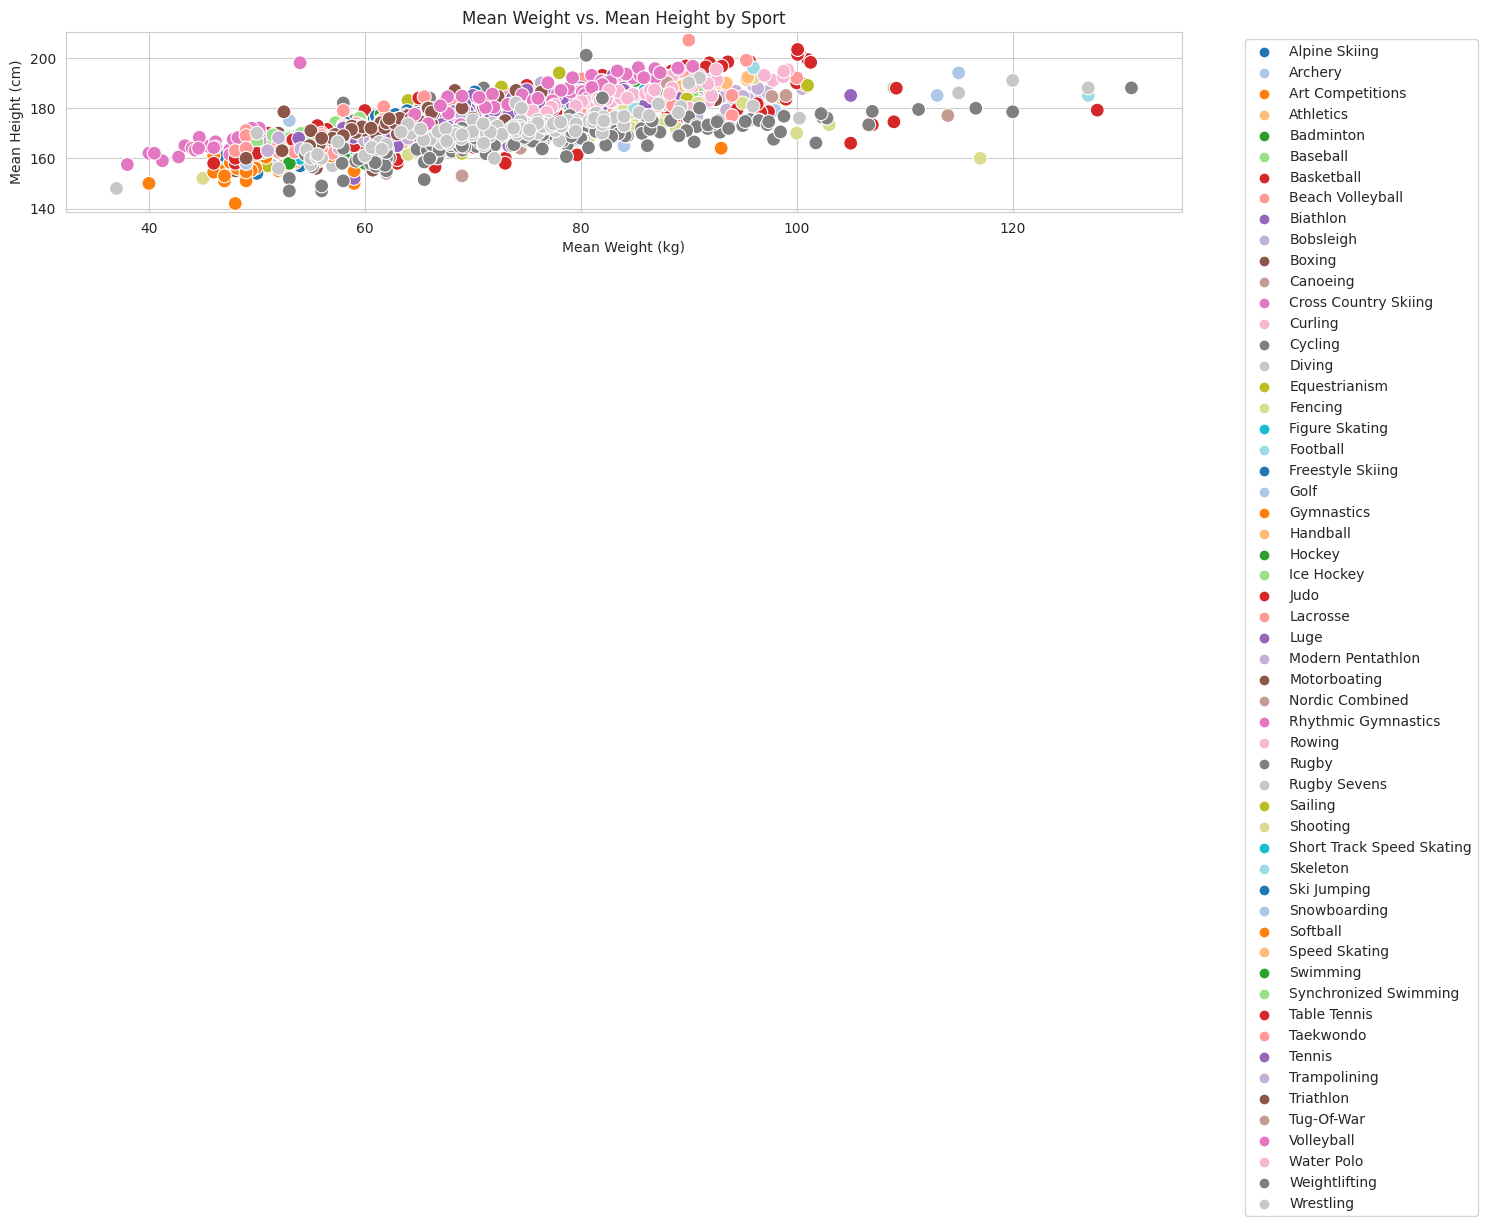

In [67]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=events_df, x='mean_weight', y='mean_height', hue='Sport', palette='tab20', edgecolor='w', s=100)
plt.title('Mean Weight vs. Mean Height by Sport')
plt.xlabel('Mean Weight (kg)')
plt.ylabel('Mean Height (cm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

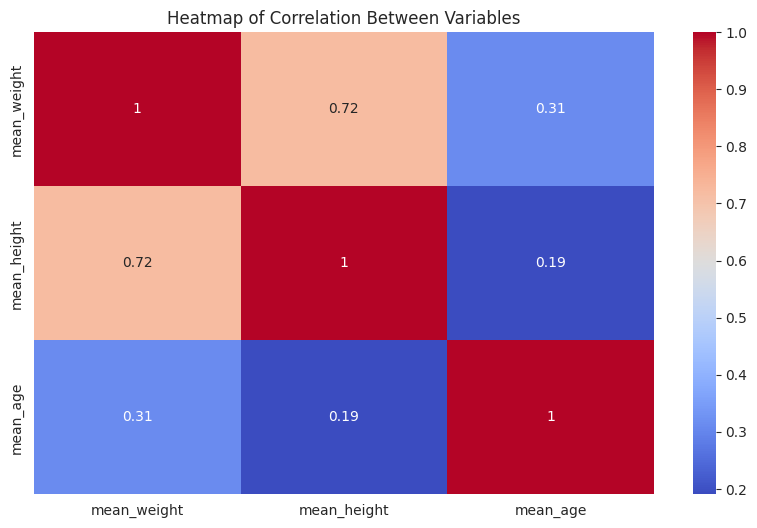

In [68]:
corr = events_df[['mean_weight', 'mean_height', 'mean_age']].corr()

# Draw the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Variables')
plt.show()

In [69]:
# 0. Sports with participants who are taller and heavier on average
tall_heavy_sports = events_df.sort_values(by=['mean_height', 'mean_weight'], ascending=False).head(3)['Sport'].tolist()
tall_heavy_sports

['Taekwondo', 'Basketball', 'Basketball']

In [70]:
# 1. Sports with participants who are shorter and leaner on average
short_lean_sports = events_df.sort_values(by=['mean_height', 'mean_weight']).head(3)['Sport'].tolist()
short_lean_sports

['Gymnastics', 'Weightlifting', 'Weightlifting']

**Observations:**

- A clear strong positive linear correlation exists between mean height and mean weight across different sports. This is expected since taller individuals generally weigh more due to their larger frame.
- There's a wide range of mean heights and weights across different sports, indicating the unique physical demands of each sport. For instance, sports that require agility and quick reflexes might have athletes with a lighter build (like Gymnastics), while those that require strength or endurance might have bulkier participants (like Basketball and Taekwondo).

### Weight against age:

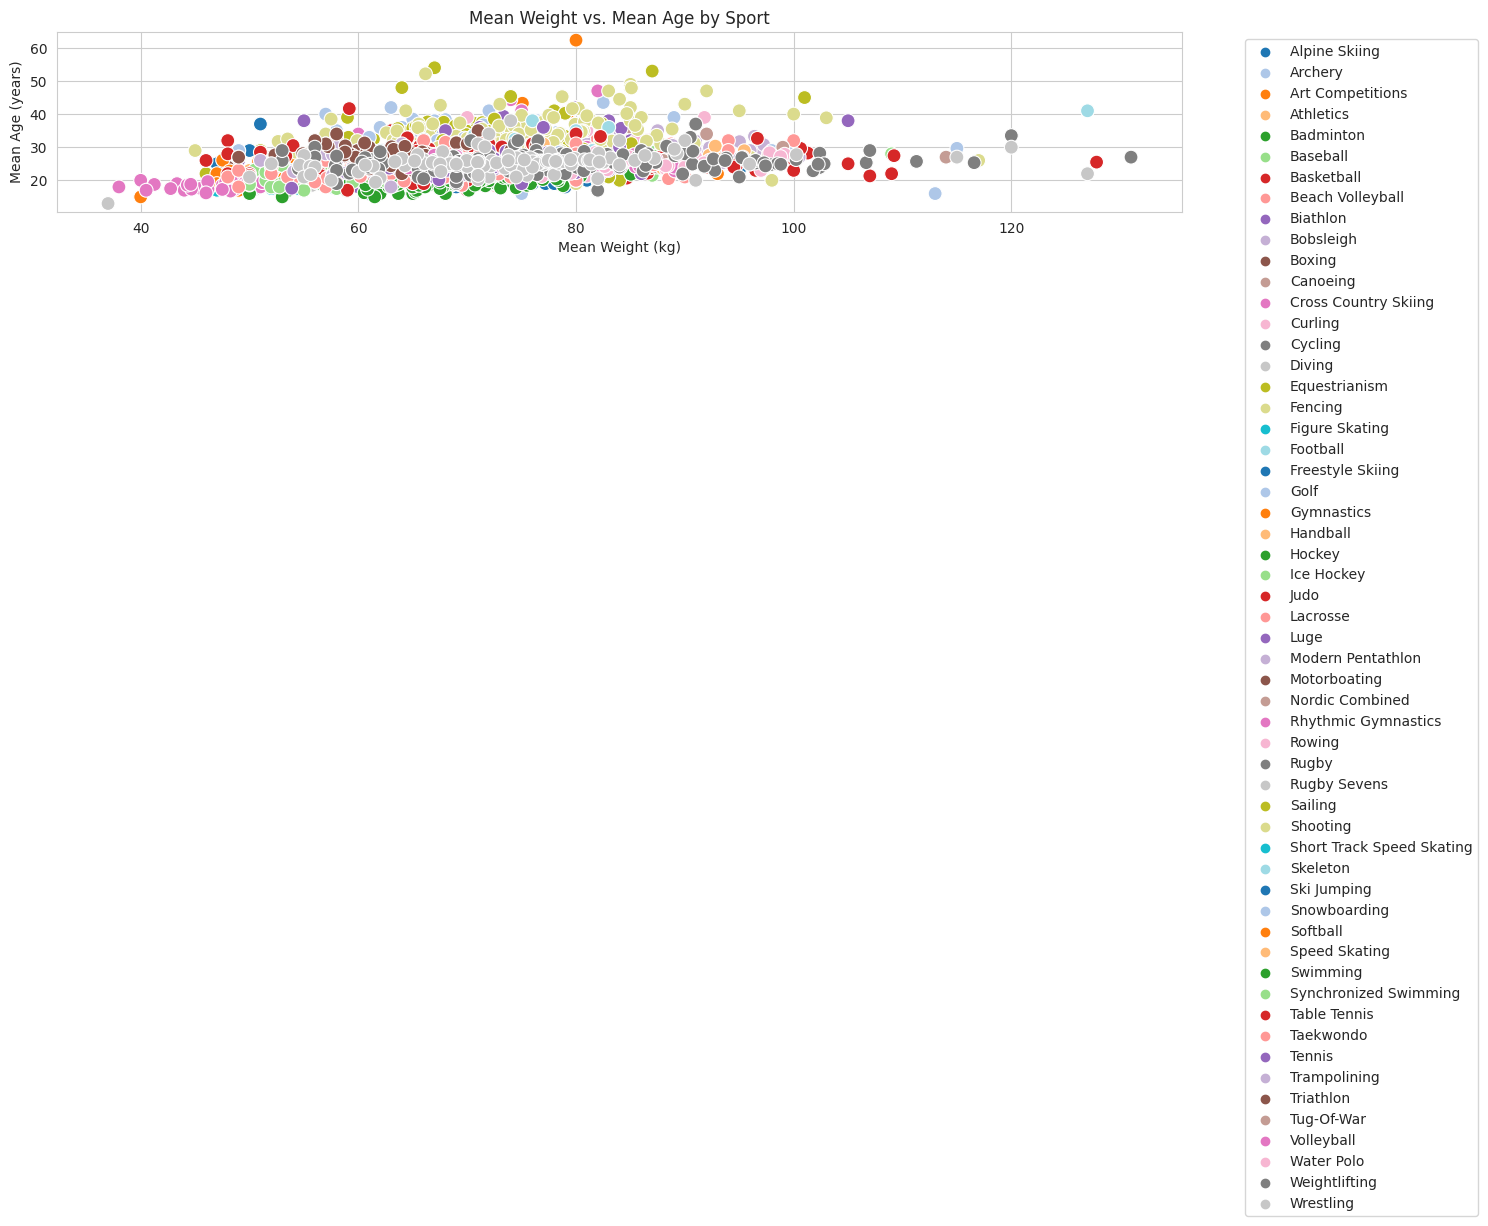

In [71]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=events_df, x='mean_weight', y='mean_age', hue='Sport', palette='tab20', edgecolor='w', s=100)
plt.title('Mean Weight vs. Mean Age by Sport')
plt.xlabel('Mean Weight (kg)')
plt.ylabel('Mean Age (years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
# 2. Sports with participants who have a higher mean age
older_athlete_sports = events_df.sort_values(by=['mean_age', 'mean_weight'], ascending=False).head(3)['Sport'].tolist()
older_athlete_sports

['Art Competitions', 'Equestrianism', 'Equestrianism']

In [73]:
# 3. Sports that lean towards younger athletes
younger_athlete_sports = events_df.sort_values(by=['mean_age', 'mean_weight']).head(3)['Sport'].tolist()
younger_athlete_sports

['Diving', 'Gymnastics', 'Swimming']

**Observations:**

- Most sports cluster around a specific range for mean age and weight. This central clustering indicates a general standard for age and weight across a majority of sports.
- Some sports have participants with higher mean ages, suggesting that experience and strategic understanding might be more critical in those sports. Or these sports are more akin to leisure sports, requiring not as much physical effort (like Archery and Art Competitions, respectively).
- Conversely, certain sports lean towards younger athletes, possibly indicating that these sports favor agility, speed, or raw talent (like Diving or Gymnastics).

### Height against age:

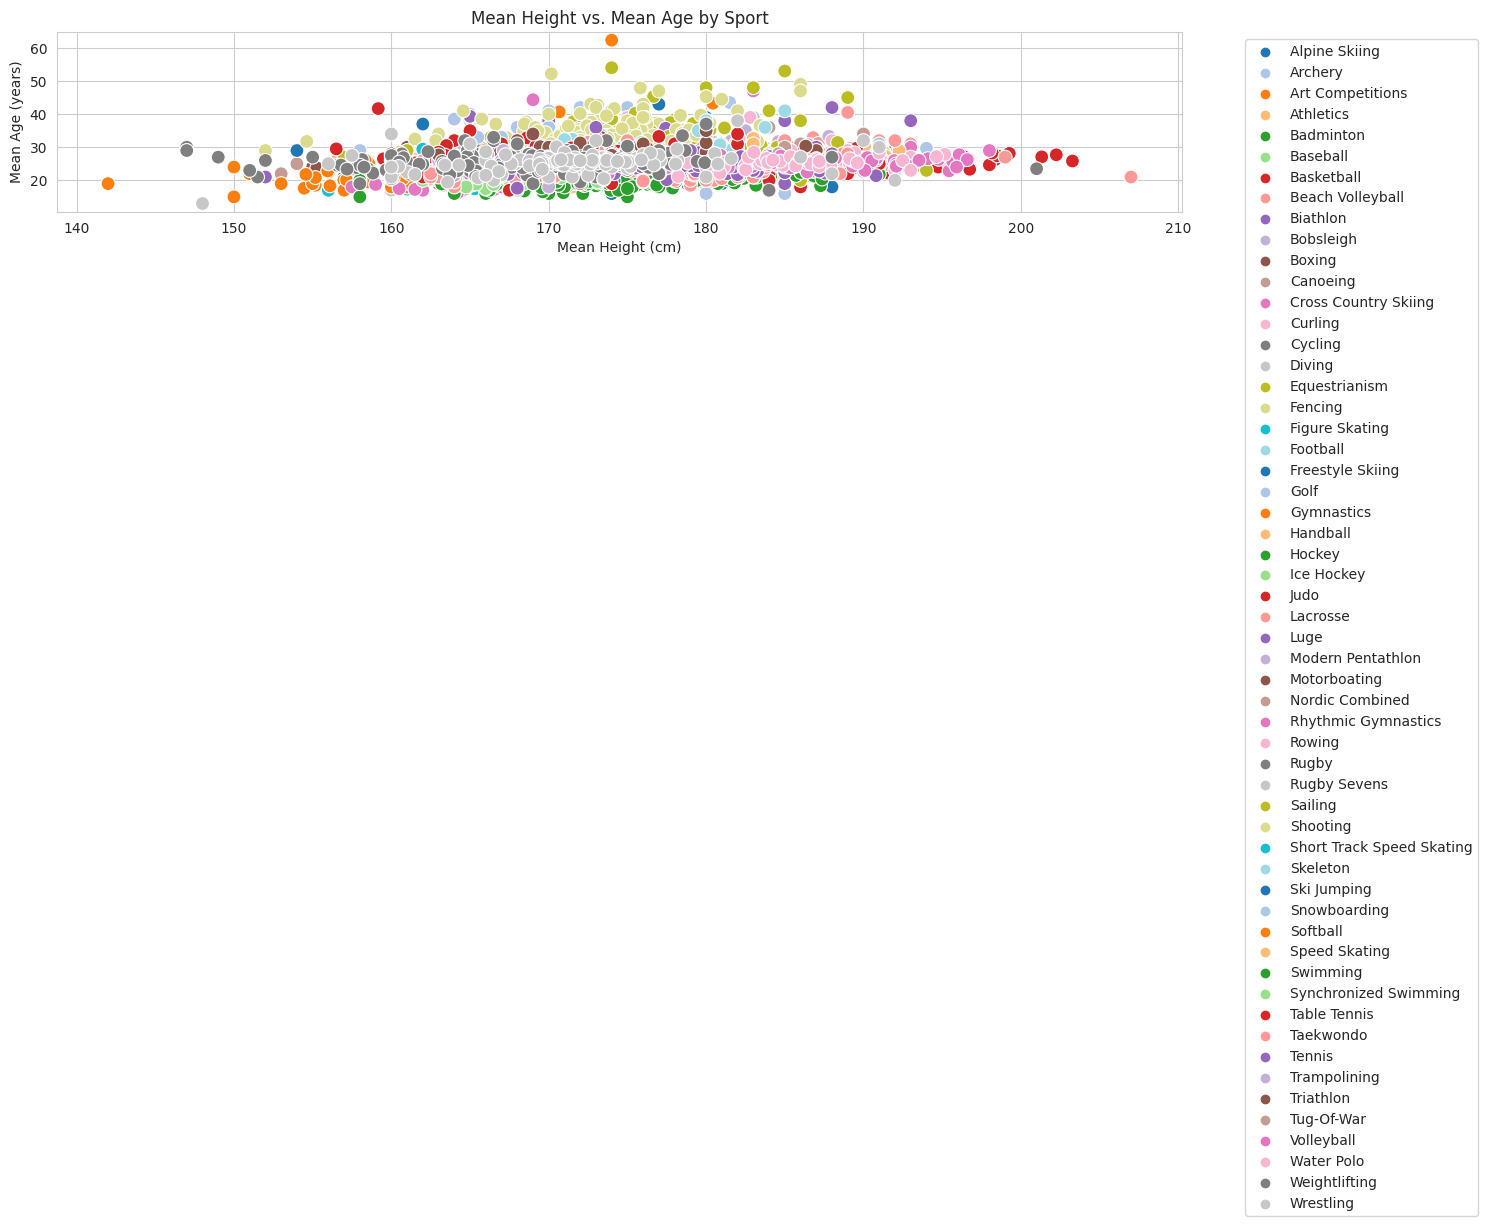

In [74]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=events_df, x='mean_height', y='mean_age', hue='Sport', palette='tab20', edgecolor='w', s=100)
plt.title('Mean Height vs. Mean Age by Sport')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Mean Age (years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
older_athlete_sports = events_df.sort_values(by=['mean_age', 'mean_height'], ascending=False).head(3)['Sport'].tolist()
older_athlete_sports

['Art Competitions', 'Equestrianism', 'Equestrianism']

In [76]:
younger_athlete_sports = events_df.sort_values(by=['mean_age', 'mean_height']).head(3)['Sport'].tolist()
younger_athlete_sports

['Diving', 'Gymnastics', 'Swimming']

In [77]:
# 4. Sports with taller athletes spanning a wide age range
tall_wide_age_range_sports = events_df[events_df['max_age'] - events_df['min_age'] > 20].sort_values(by='mean_height', ascending=False).head(3)['Sport'].tolist()
tall_wide_age_range_sports

['Volleyball', 'Basketball', 'Volleyball']

In [78]:
# 5. Sports with shorter athletes spanning a wide age range
short_wide_age_range_sports = events_df[events_df['max_age'] - events_df['min_age'] > 20].sort_values(by='mean_height').head(3)['Sport'].tolist()
short_wide_age_range_sports

['Shooting', 'Gymnastics', 'Gymnastics']

**Observations:**

- There's no clear trend between mean height and mean age across sports. This suggests that the age of participants in a sport isn't strongly influenced by the average height requirements of that sport
- Some sports with taller athletes have both young and experienced participants, indicating that height might be a crucial factor regardless of age (such as Basketball and Volleyball, as expected).
- On the other hand, some sports with shorter athletes also have a wide age range, suggesting that height is not a restrictive factor in those sports (like Shooting or Art Competitions).

### **Analysis Conclusion**

While height and weight are naturally correlated, the age of participants in a sport doesn't show a clear relationship with either height or weight. The specific requirements and nature of each sport play a significant role in determining the average physical attributes and age of its participants.

# **Time series Analysis**

#### (a)  Create a table called `games` where each data point is a game. This table will include the total number of participants per game, the number of unique sports, and the number of unique events.

In [79]:
# Group by 'Games' and calculate the required statistics
games = df_main.groupby('Games').agg(
    Total_participants=pd.NamedAgg(column='Name', aggfunc='count'),
    Unique_sports=pd.NamedAgg(column='Sport', aggfunc=pd.Series.nunique),
    Unique_events=pd.NamedAgg(column='Event', aggfunc=pd.Series.nunique)
)

# Reset the index
games.reset_index(inplace=True)
games.head(10)

,Games,Total_participants,Unique_sports,Unique_events
0,1896 Summer,380,9,43
1,1900 Summer,1936,20,90
2,1904 Summer,1301,18,95
3,1906 Summer,1733,13,74
4,1908 Summer,3101,24,109
5,1912 Summer,4040,17,107
6,1920 Summer,4292,25,158
7,1924 Summer,5233,20,131
8,1924 Winter,460,10,17
9,1928 Summer,4992,17,122


#### (b) Draw a line graph for each of these variables. Use separate lines for the summer and winter Olympics.

In [80]:
# Extract the 'Season' from the 'Games' column
games['Season'] = games['Games'].apply(lambda x: x.split(' ')[1])

# Extract the 'Year' from the 'Games' column
games['Year'] = games['Games'].apply(lambda x: x.split(' ')[0])

games.drop('Games', axis=1, inplace=True)

# Separate the data for the Summer and Winter Olympics into seperate tables
summer_games = games[games['Season'] == 'Summer']
winter_games = games[games['Season'] == 'Winter']


In [81]:
games.head(10)

,Total_participants,Unique_sports,Unique_events,Season,Year
0,380,9,43,Summer,1896
1,1936,20,90,Summer,1900
2,1301,18,95,Summer,1904
3,1733,13,74,Summer,1906
4,3101,24,109,Summer,1908
5,4040,17,107,Summer,1912
6,4292,25,158,Summer,1920
7,5233,20,131,Summer,1924
8,460,10,17,Winter,1924
9,4992,17,122,Summer,1928


In [82]:
summer_games.head(5)

,Total_participants,Unique_sports,Unique_events,Season,Year
0,380,9,43,Summer,1896
1,1936,20,90,Summer,1900
2,1301,18,95,Summer,1904
3,1733,13,74,Summer,1906
4,3101,24,109,Summer,1908


In [83]:
winter_games.head(5)

,Total_participants,Unique_sports,Unique_events,Season,Year
8,460,10,17,Winter,1924
10,582,8,14,Winter,1928
12,352,7,14,Winter,1932
14,895,8,17,Winter,1936
16,1075,9,22,Winter,1948


Now that the data has been seperated, we can draw the line graphs

(i) Line graph for the total number of participants

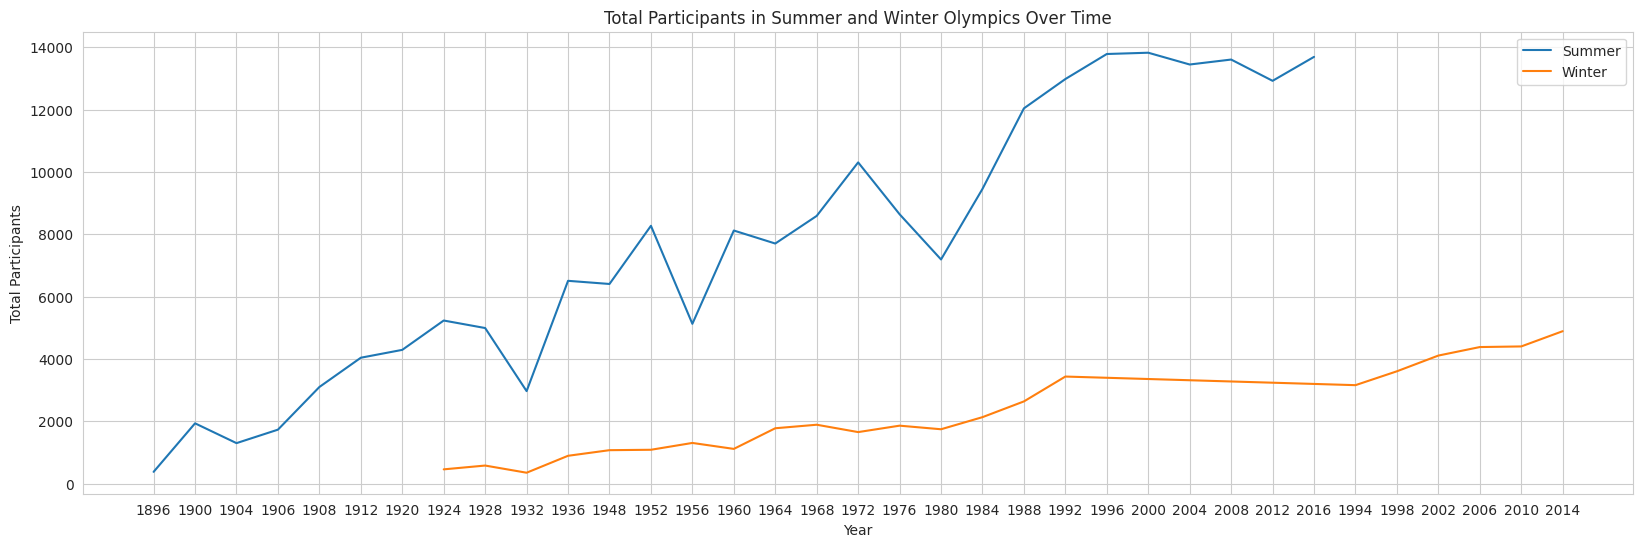

In [84]:
plt.figure(figsize=(20, 6))
plt.plot(summer_games['Year'], summer_games['Total_participants'], label='Summer')
plt.plot(winter_games['Year'], winter_games['Total_participants'], label='Winter')
plt.xlabel('Year')
plt.ylabel('Total Participants')
plt.title('Total Participants in Summer and Winter Olympics Over Time')
plt.legend()
plt.show()

(ii) Line graph for the number of unique sports

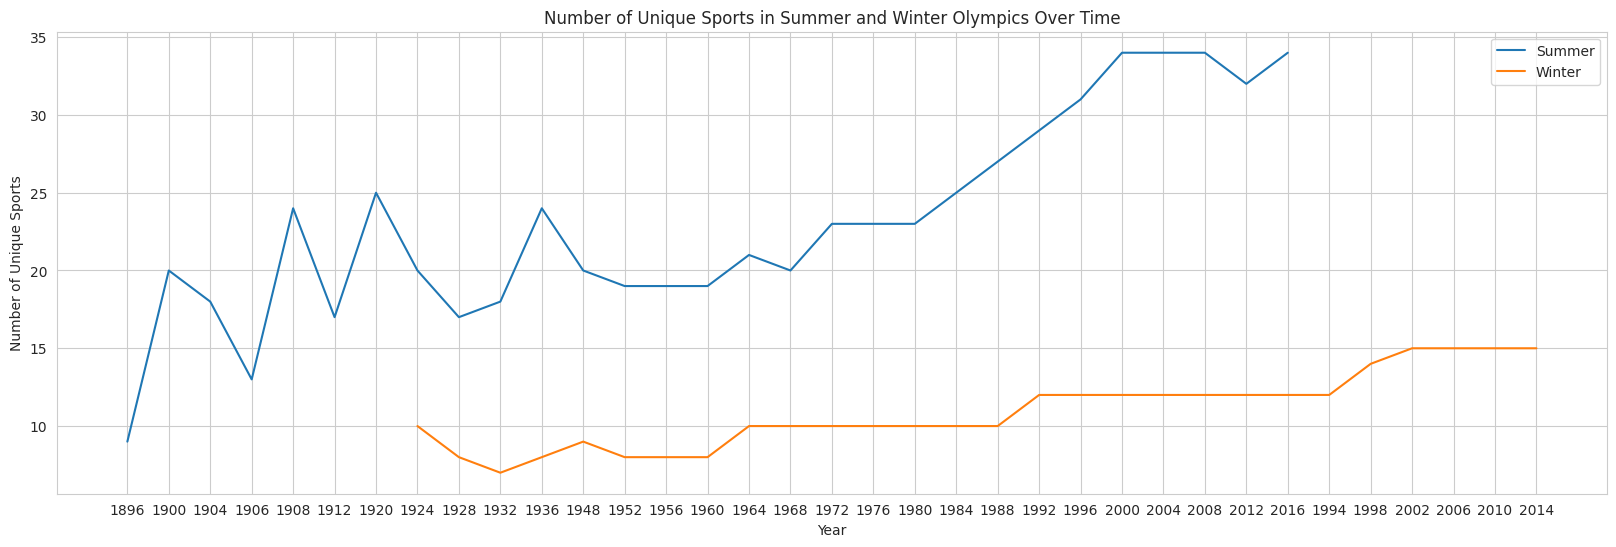

In [85]:
plt.figure(figsize=(20, 6))
plt.plot(summer_games['Year'], summer_games['Unique_sports'], label='Summer')
plt.plot(winter_games['Year'], winter_games['Unique_sports'], label='Winter')
plt.xlabel('Year')
plt.ylabel('Number of Unique Sports')
plt.title('Number of Unique Sports in Summer and Winter Olympics Over Time')
plt.legend()
plt.show()

(iii) Line graph for the number of unique events

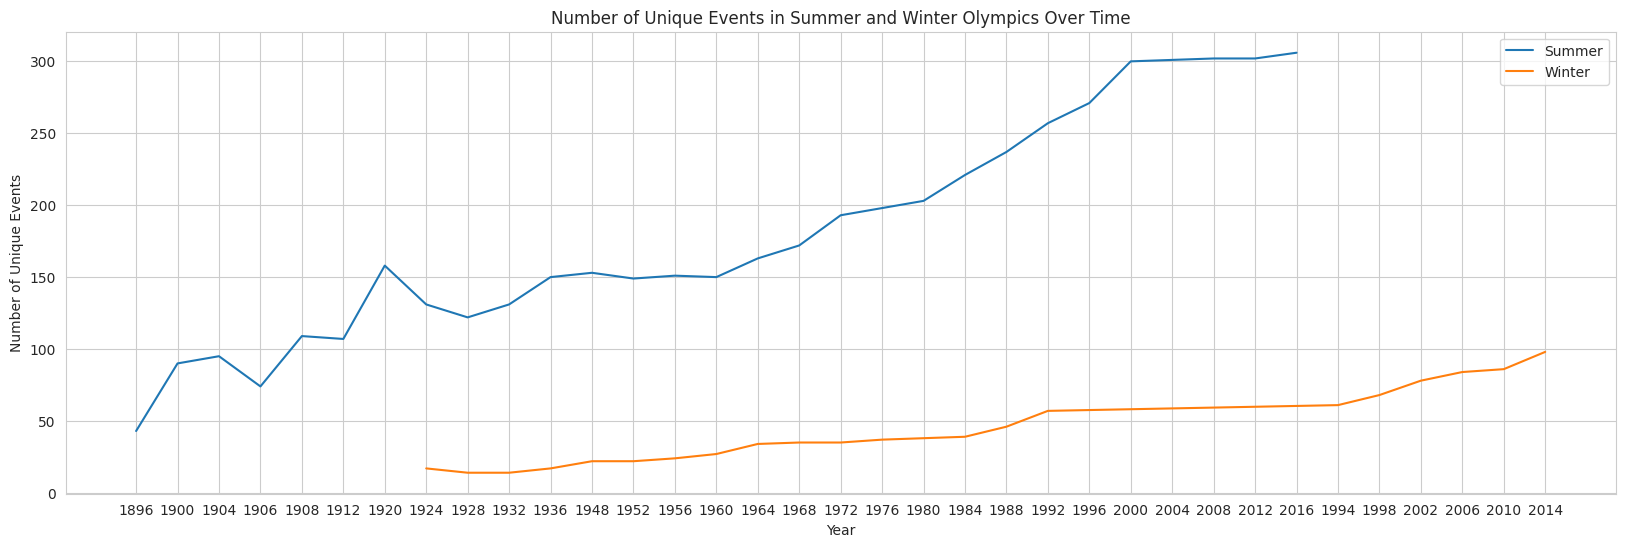

In [86]:
plt.figure(figsize=(20, 6))
plt.plot(summer_games['Year'], summer_games['Unique_events'], label='Summer')
plt.plot(winter_games['Year'], winter_games['Unique_events'], label='Winter')
plt.xlabel('Year')
plt.ylabel('Number of Unique Events')
plt.title('Number of Unique Events in Summer and Winter Olympics Over Time')
plt.legend()
plt.show()

### (c) Analysis of the figures

Before we comment on the above figures, we first plot a heatmap to explore correlations between the variables if any

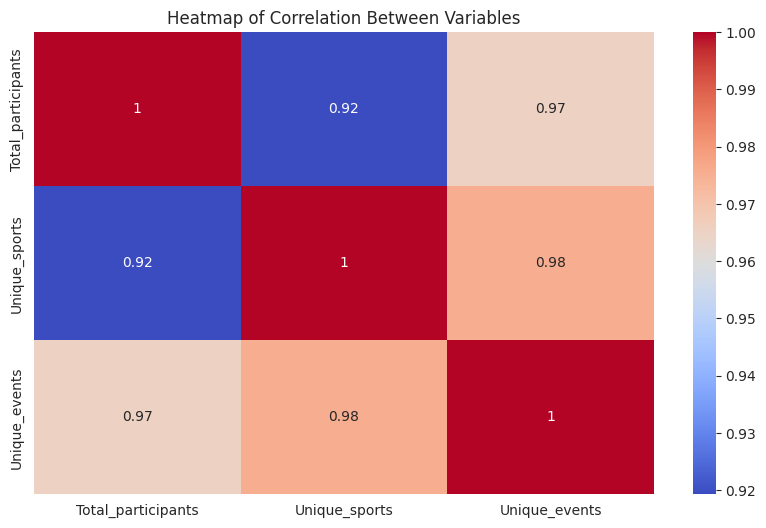

In [87]:
# Calculate the correlation matrix
corr = games[['Total_participants', 'Unique_sports', 'Unique_events']].corr()

# Draw the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Variables')
plt.show()

Firstly, from the time series line graphs, we observe that, over the years, from 1896 to 2014, more unique sports and events were added to the summer and winter olympics. The above heatmap suggets that this lead to higher numbers of total participants. The correletion coeffecients between total participants and unique sports an events are quite close to 1.0, which confirms the above. However this could also mean the reverse, that more of these events and sports were created in response to higher numbers of participants.

We also note that most of the unique events and sports were added in summer more than in winter, hence we observe the numbers of total participants are higher in summer than in winter. This suggests that athletes would rather compete in these games in summer's warmer weather rather than in winter.


# **Other**

#### Gender Distribution:

In [ ]:
gender_counts = df_main['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Olympic Participants')
plt.show()

Historical data from 1896 to 2016 indicates that there has been a greater participation of males compared to females in the Olympics.

#### Athlete's Height vs. Weight:

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_main['Height'], df_main['Weight'], alpha=0.5)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs. Weight of Olympic Athletes')
plt.grid(True)
plt.show()

The data suggests a direct proportional relationship between height and weight, where an increase in height corresponds to an increase in weight. Although there are some outliers present, they can be considered insignificant. This positive relationship between height and weight implies that an individual's weight is influenced positively by their height, and vice versa.

#### Age Distribution:

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_main['Age'], bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Olympic Participants')
plt.grid(True)
plt.show()

Based on the graph, the majority of participants fall within the age range of approximately 25-30 years, indicating that this group represents the mean age of the participants. The right skewness in the graph suggests a lower representation of individuals above 40 years of age. Notably, the data also indicates the presence of participants as old as 70 years in the Olympics.

#### Sports Participation Over Time:

In [ ]:
times = df_main.groupby('Year')['Sport'].nunique()
plt.figure(figsize=(12, 8))
plt.plot(times.index, times.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.title('Sports Participation Over Time')
plt.grid(True)
plt.show()

The line graph depicting unique sports illustrates a notable upward trend over time, suggesting a corresponding increase in the diversity of sports. This trend indicates that the Olympics have evolved to become more inclusive, accommodating a broader range of sports and activities.

#### Medals by Country:

In [ ]:
countries_df[['NOC', 'Gold', 'Silver', 'Bronze']].set_index('NOC').plot(kind='bar', stacked=False, figsize=(50, 5))
plt.xlabel('Country/NOC')
plt.ylabel('Number of Medals')
plt.title('Medals by Country')
plt.show()

The bar graph illustrates the distribution of medals across various countries, highlighting that the majority of countries have a relatively low count of medals. The United States of America (USA) emerges as the dominant leader with the highest number of Gold, Silver, and Bronze medals. Following closely behind are other notable performers such as the United Kingdom (GBR) and several other countries.